In [10]:
from skimage.morphology import skeletonize
from skimage import data, morphology, measure
import matplotlib.pyplot as plt

from skimage.util import invert

import numpy as np

from scipy import ndimage

import os
from PIL import Image




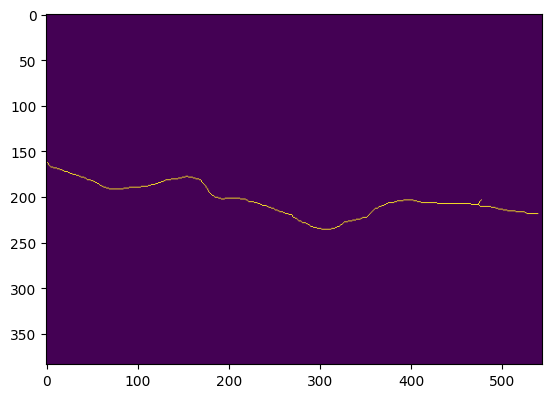

In [8]:
mask_path = "../assets/datasets/DeepCrack/train_lab/7Q3A9060-1.png"
mask = np.asarray(Image.open(mask_path))
skeleton = skeletonize(mask)
# distances = 

plt.imshow(skeleton)
plt.show()


dystans szkieletowy:552 px
dystans maski:1780665 px


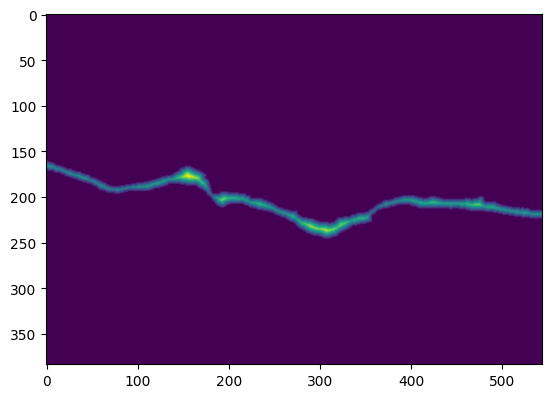

In [11]:
distance = ndimage.distance_transform_edt(mask)

print(f"dystans szkieletowy:{np.sum(skeleton)} px")
print(f"dystans maski:{np.sum(mask)} px")

plt.imshow(distance)

In [ ]:
labeled = measure.label(mask)
labeled.max()


def get_measurement(data: np.array)->dict :
  # crofton perimiter vs default perimeter
  skeleton = skeletonize(data)
  
  crack_length_px = np.sum(skeleton)
  data_measured = measure.regionprops(data)

  data_properties = {}
  
  for property in data_measured:
     data_properties["length_px"] = crack_length_px
     data_properties["area_px"] = property.area
     data_properties["perimeter_px"] = property.perimeter_crofton
     data_properties["bbox_px"] = property.bbox
    

  return data_properties

d = get_measurement(mask)




{'length_px': np.int64(552),
 'area_px': np.float64(6983.0),
 'perimeter_px': np.float64(1203.7304926602712),
 'bbox_px': (161, 0, 247, 544)}